# 1. 텐서플로 버젼 확인(라이블러리들 버젼확인)

In [11]:
# 그래프, 연산처리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 텐서플로우 처리
import tensorflow as tf
from tensorflow import keras

# 학습 시간 확인
import time

# 턴서프로우 모델 설계
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

In [2]:
!pip install pandas

  Using cached pandas-2.2.2-cp310-cp310-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.2-cp310-cp310-win_amd64.whl (11.6 MB)
Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)


# 2. 버젼 확인

In [5]:
# 버젼확인
print("tensorflow : ", tf.__version__)
print("numpy : ", np.__version__)

tensorflow :  2.16.1
numpy :  1.26.4


# 3. 그래프를 작성

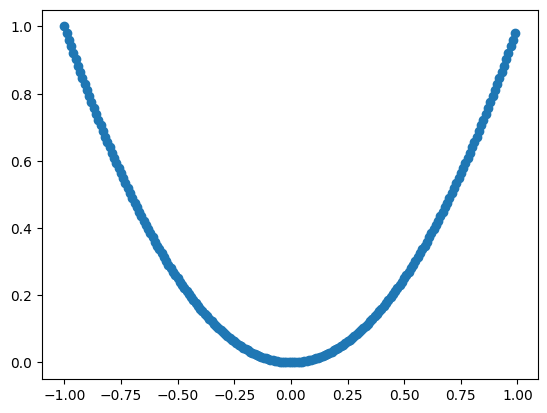

In [58]:
x = np.arange(-1, 1, 0.01)
y = x**2

plt.scatter(x,y)

# 4. 데이터가 어떤 구조를 가지고 있는지 ?

In [59]:
print("데이터크기(x) :", len(x))
print("데이터구조(x) :", x.shape)

데이터크기(x) : 200
데이터구조(x) : (200,)


# 5. 간단한 Tensorflow 모델생성

In [65]:
# 모델 정의
model = keras.Sequential()
model.add(Input([1]))
model.add(Dense(5, activation='tanh'))
model.add(Dense(5, activation='tanh'))
model.add(Dense(5, activation='tanh'))
model.add(Dense(5, activation='tanh'))
model.add(Dense(1))

In [66]:
# 컴파일
model.compile(optimizer='SGD', loss='mse')

In [67]:
# 학습
model.fit(x, y, epochs=500, verbose=0, batch_size=20)

In [68]:
# 예측
rst = model.predict(x)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


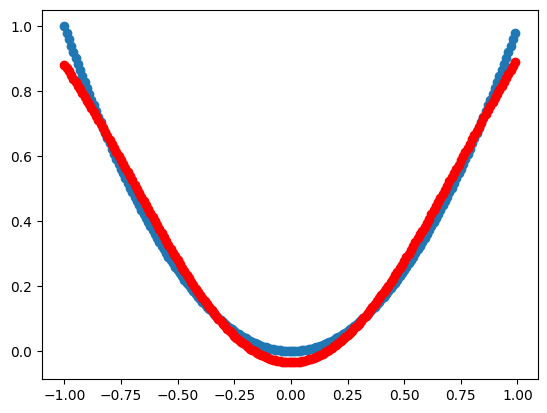

In [69]:
# 결과를 그래프로 확인
plt.scatter(x, y) # 실제 그래프(정답)
plt.scatter(x, rst, color='r') # 예측 결과값
plt.show()

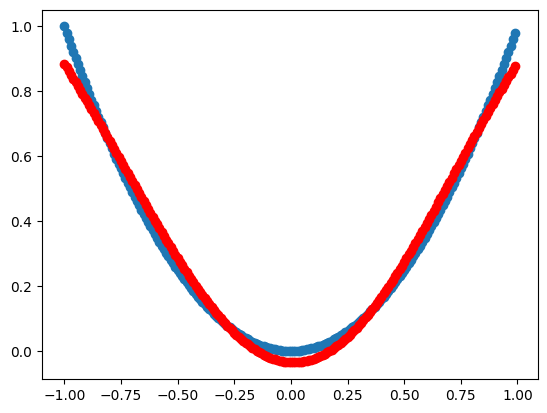

In [23]:
# 결과를 그래프로 확인
plt.scatter(x, y) # 실제 그래프(정답)
plt.scatter(x, rst, color='r') # 예측 결과값
plt.show()

# 테스트셋으로 평가

In [37]:
x = np.arange(-1, 1, 0.01)
np.random.shuffle(x)
y = x**2

In [38]:
x.shape

(200,)

In [39]:
# 데이터 분리
split_index = int(x.shape[0]*0.7)
split_index

140

In [40]:
# 데이터 분리 처리
train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

In [41]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((140,), (60,), (140,), (60,))

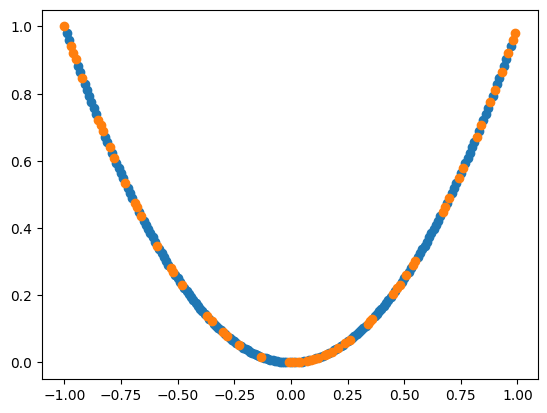

In [48]:
# 데이터를 섞었을때 데이터가 어떻게 표시되는지 ?
plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y)
plt.show()
# 그래프 저장 - 주의점 : show로 보인 후 저장시 공간만 저장됨
plt.savefig('img_test.png')

# 저장된 이미지를 불러와서 보여주고 싶은경우

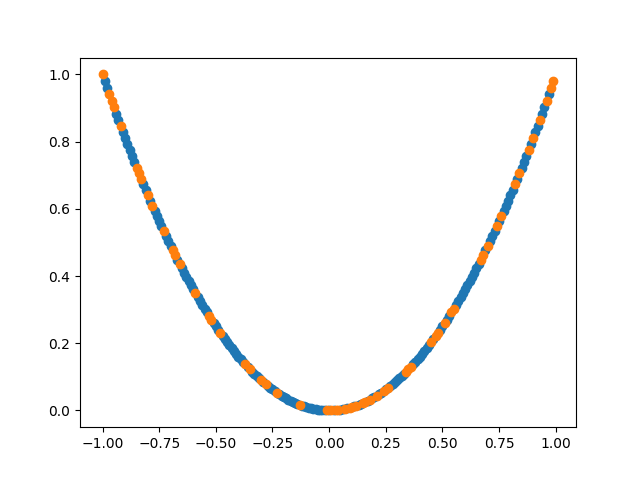

In [52]:
from IPython.display import Image
display(Image("./img_test.png"))

# 외부에 명령어 사용

In [55]:
!dir

 D 드라이브의 볼륨: 백업디스크
 볼륨 일련 번호: 080F-4620

 D:\ai_exam\cnn_exam 디렉터리

2024-05-20  오전 11:23    <DIR>          .
2024-05-20  오전 11:23    <DIR>          ..
2024-05-20  오전 11:15    <DIR>          .ipynb_checkpoints
2024-05-17  오후 05:28             1,489 7.jpg
2024-05-20  오전 11:19            22,978 img_test.png
2024-05-17  오후 05:24           773,200 mnist_cnn_20240517_epochs_50_9865.h5
2024-05-17  오후 03:33            32,294 model.png
2024-05-17  오후 01:32             2,721 requirements.txt
2024-05-17  오후 05:43           304,998 tensorflow_cnn.ipynb
2024-05-17  오후 12:03           109,752 tensorflow_linear.ipynb
2024-05-20  오전 11:23           331,759 tensorflow_module.ipynb
2024-05-17  오전 11:23                 0 test.py
               9개 파일           1,579,191 바이트
               3개 디렉터리  25,426,661,376 바이트 남음


# 학습 시간 출력

In [56]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer='SGD', loss='mse', metrics=['mse'])

C:\Users\hi\anaconda3\envs\p310_cnn\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
# 시간 체크
start_time = time.time() # 시작

# 모델 학습
model.fit(train_x, train_y, epochs=500, verbose=0, batch_size=20)

# 학습 종료
print("학습시간 : {}".format(time.time() - start_time))


학습시간 : 13.58534049987793


# 데이터를 sin으로 변경 해서 처리

In [71]:
# 데이터 sin처리 하는 함수
def get_sin_data(start=0, end=10, step=0.1):
    x = np.arange(start, end, step)
    np.random.shuffle(x)
    y = np.sin(x)

    split_index = int(x.shape[0]*0.6)

    train_x, test_x = x[:split_index], x[split_index:]
    train_y, test_y = y[:split_index], y[split_index:]

    return (train_x, train_y), (test_x, test_y)

In [74]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

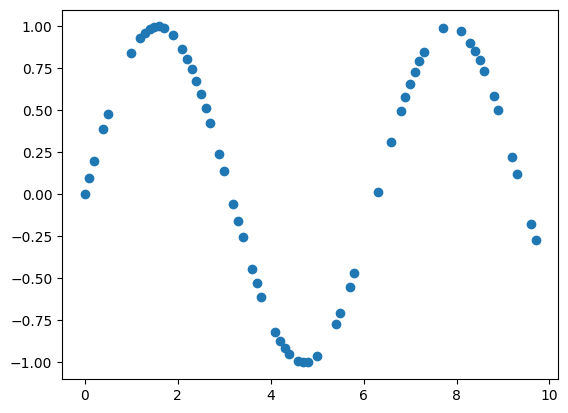

In [75]:
plt.scatter(train_x, train_y)
plt.show()

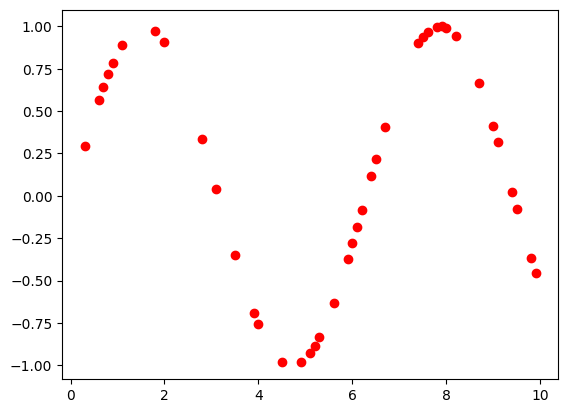

In [76]:
plt.scatter(test_x, test_y, color='r')
plt.show()

In [78]:
# 모델 신규 생성
model1 = keras.Sequential()
model1.add(Dense(10, activation='tanh', input_shape=(1,)))
model1.add(Dense(10, activation='tanh'))
model1.add(Dense(1))

model1.compile(optimizer='SGD', loss='mse', metrics=['mse'])
model1.summary()

start_time = time.time()
model1.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("학습시간 : {}".format(time.time() - start_time))

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ Layer (type)             ┃ Output Shape      ┃   Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ dense_20 (Dense)         │ (None, 10)        │        20 │
├──────────────────────────┼───────────────────┼───────────┤
│ dense_21 (Dense)         │ (None, 10)        │       110 │
├──────────────────────────┼───────────────────┼───────────┤
│ dense_22 (Dense)         │ (None, 1)         │        11 │
└──────────────────────────┴───────────────────┴───────────┘

 Total params: 141 (564.00 B)

 Trainable params: 141 (564.00 B)

 Non-trainable params: 0 (0.00 B)

학습시간 : 22.410545587539673


# 결과 보기

In [79]:
loss, mse = model1.evaluate(test_x, test_y)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1720 - mse: 0.1720  


In [80]:
print("loss =", loss)
print("mse =", mse)

loss = 0.16542959213256836
mse = 0.16542959213256836


In [81]:
rst = model1.predict(test_x)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


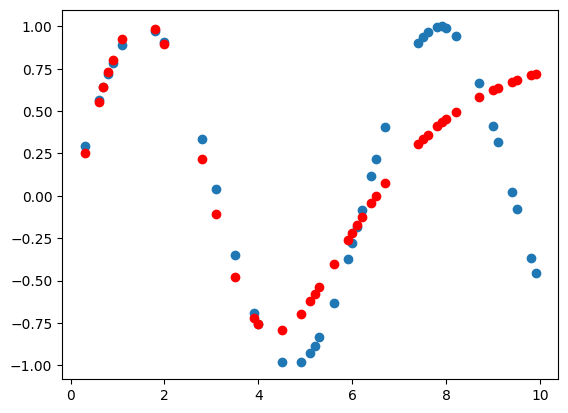

In [82]:
plt.scatter(test_x, test_y)
plt.scatter(test_x, rst, color='r')
plt.show()

# 그래프를 조정하여 맞추는 방법

In [83]:
def fit_one_more(model, train_x, train_y, test_x, test_y, batch_size=20):
    start_time = time.time()
    model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=batch_size)
    print("학습 진행 : {}".format(time.time() - start_time))

    rst = model.predict(test_x)

    plt.scatter(test_x, test_y)
    plt.scatter(test_x, rst, color='r')
    plt.show()

def fit_n_times(model, train_x, train_y, test_x, test_y, n):
    for i in range(n):
        print(f"{i} 번째 학습중...")
        fit_one_more(model, train_x, train_y, test_x, test_y)

0 번째 학습중...
학습 진행 : 23.073461055755615
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


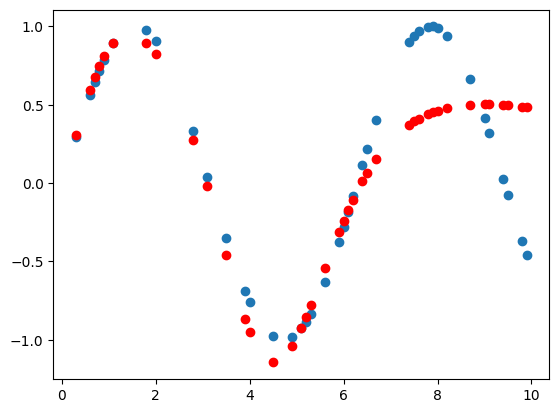

1 번째 학습중...
학습 진행 : 23.53343915939331
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step


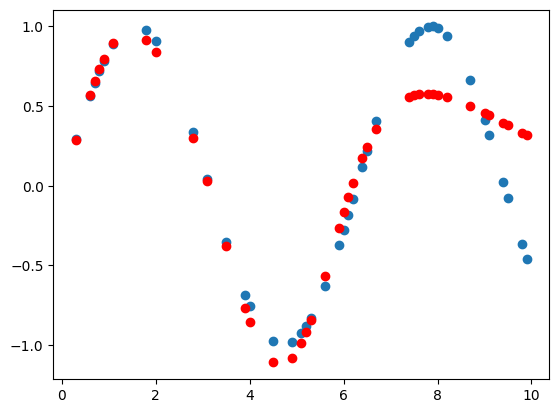

2 번째 학습중...
학습 진행 : 22.596395254135132
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


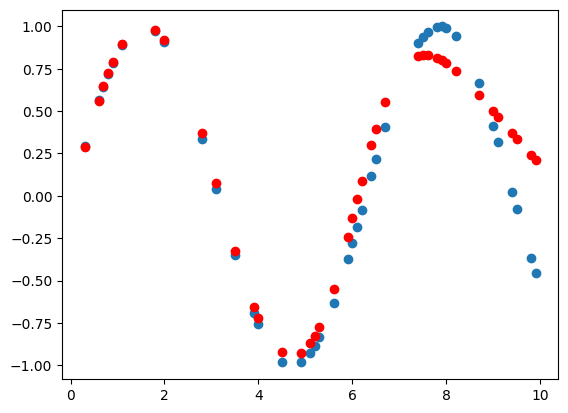

3 번째 학습중...
학습 진행 : 23.281866312026978
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


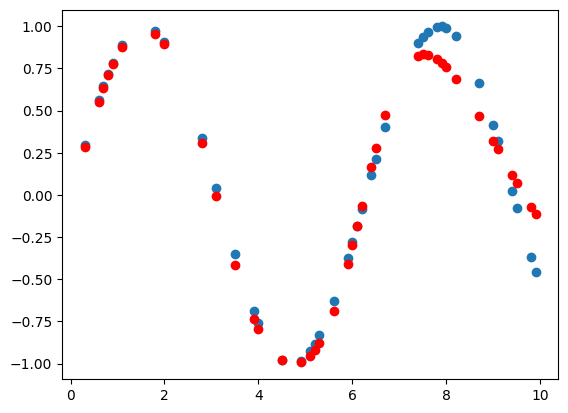

4 번째 학습중...
학습 진행 : 22.4939067363739
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


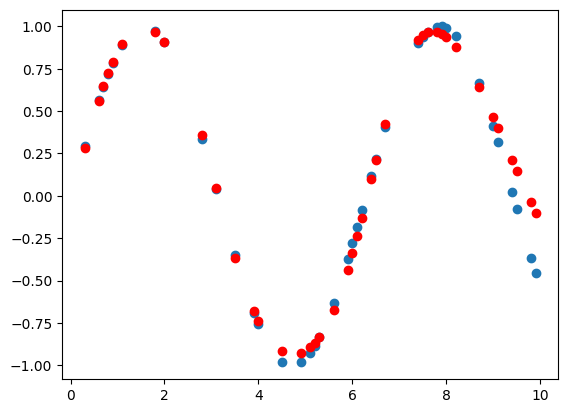

5 번째 학습중...
학습 진행 : 23.238205432891846
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


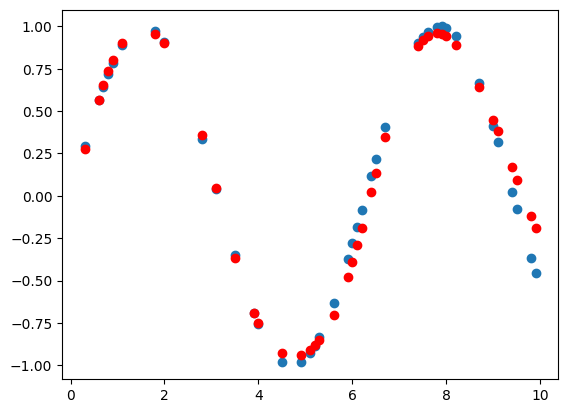

6 번째 학습중...
학습 진행 : 22.20950722694397
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


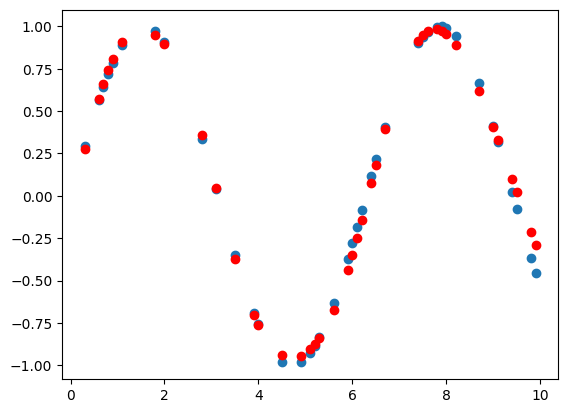

7 번째 학습중...
학습 진행 : 22.627544403076172
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


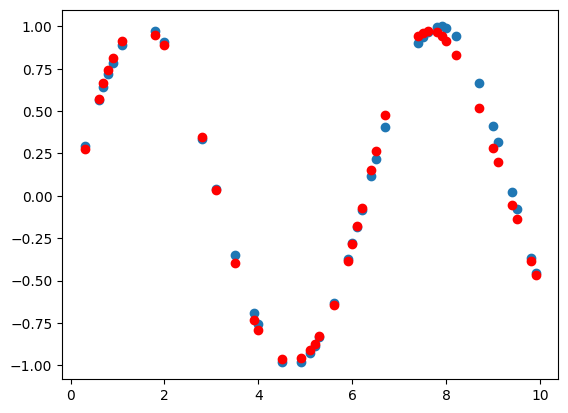

8 번째 학습중...
학습 진행 : 22.14828062057495
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


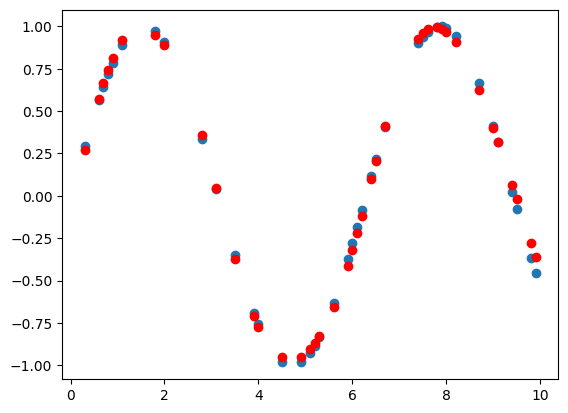

9 번째 학습중...
학습 진행 : 22.14079260826111
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


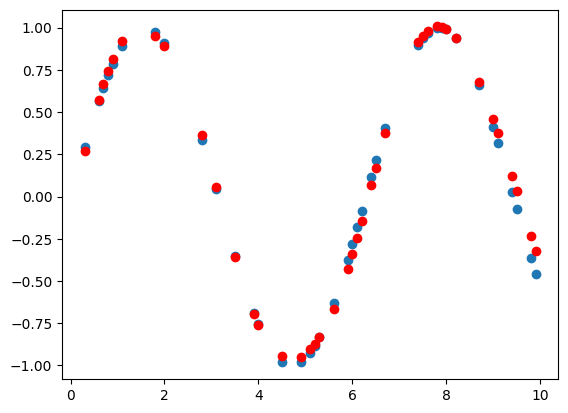

In [84]:
# 1000번씩 10번 학습하는 과정을 그래프로 표기
fit_n_times(model1, train_x, train_y, test_x, test_y, 10)

# GPU가 있는 경우[batch 개수가 1,2,5,10,20,50,100]

In [92]:
def build_model():
    model = keras.Sequential()
    model.add(Dense(10, activation='tanh', input_shape=(1,)))
    model.add(Dense(10, activation='tanh'))
    model.add(Dense(1))

    model.compile(optimizer='SGD', loss='mse', metrics=['mse'])

    return model

def fit_batch_size(train_x, train_y, test_x, test_y, batch_sizes):
    for batch in batch_sizes:
        model = build_model()
        print(f"배치 싸이즈 크기 : {batch}")
        fit_one_more(model, train_x, train_y, test_x, test_y, batch)

배치 싸이즈 크기 : 1
학습 진행 : 64.77662944793701
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


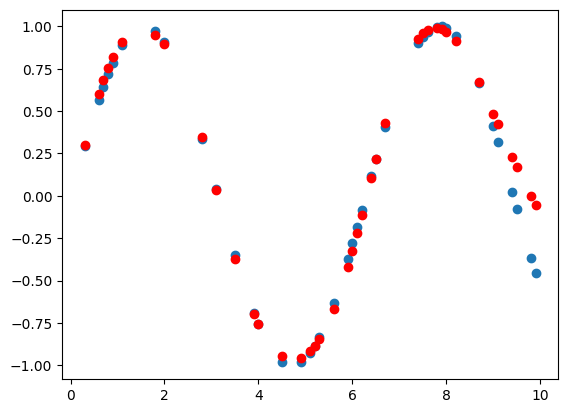

배치 싸이즈 크기 : 2
학습 진행 : 42.549012422561646
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


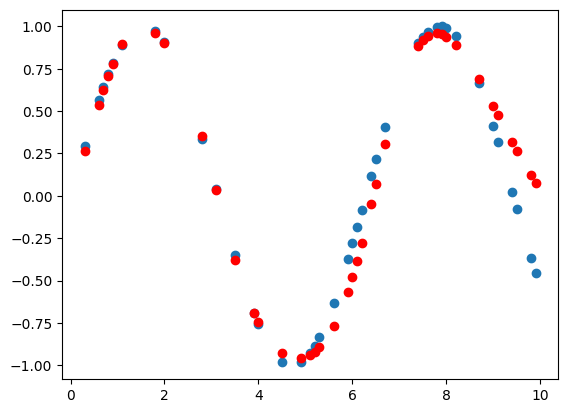

배치 싸이즈 크기 : 5
학습 진행 : 30.927358865737915
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


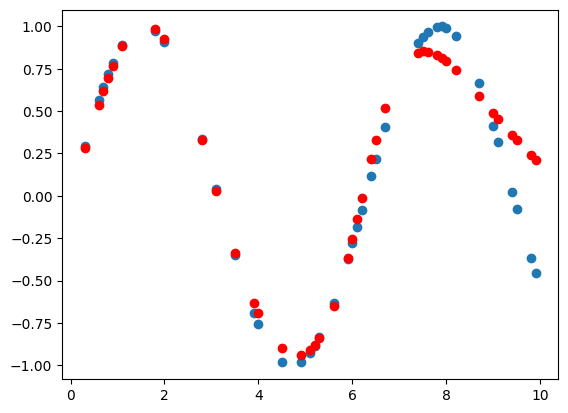

배치 싸이즈 크기 : 10
학습 진행 : 25.473456621170044
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


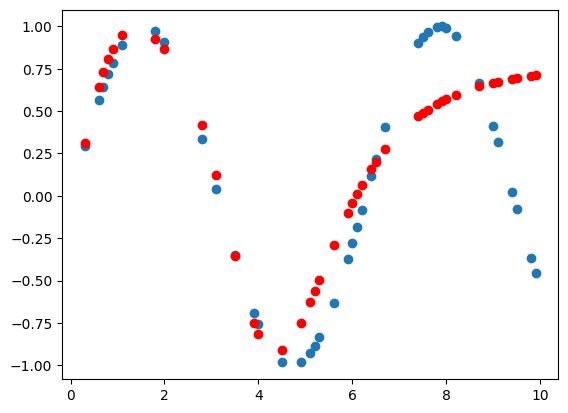

배치 싸이즈 크기 : 20
학습 진행 : 23.041954517364502
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


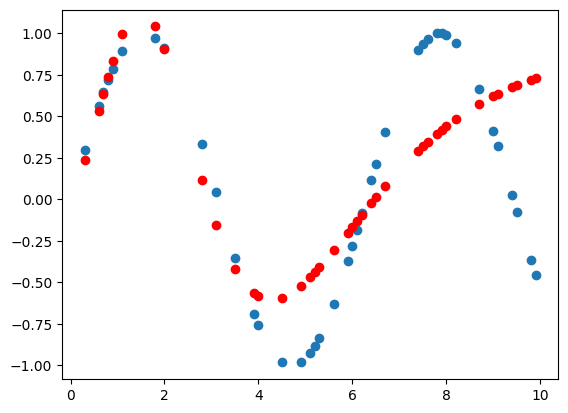

배치 싸이즈 크기 : 50
학습 진행 : 23.853821516036987
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


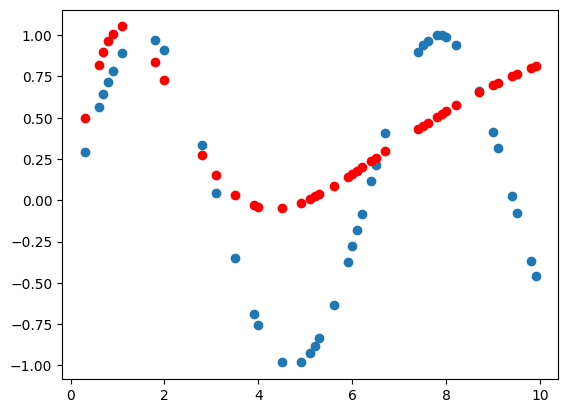

배치 싸이즈 크기 : 100
학습 진행 : 22.869582414627075
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


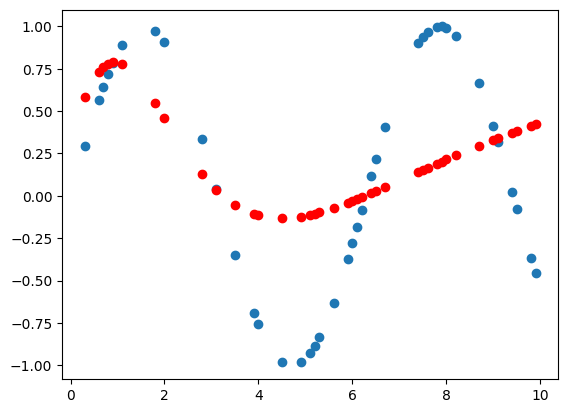

In [93]:
fit_batch_size(train_x, train_y, test_x, test_y, batch_sizes=[1,2,5,10,20,50,100])

# 데이터 크기가 영향을 주는지 ?

In [94]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.01)

In [100]:
model2 = keras.Sequential()
model2.add(Dense(10, activation='tanh', input_shape=(1,)))
model2.add(Dense(10, activation='tanh'))
model2.add(Dense(1))

model2.compile(optimizer='SGD', loss='mse', metrics=['mse'])

start_time = time.time()
history = model2.fit(train_x, train_y, epochs=100, verbose=2, batch_size=20)
print("학습시간 : {}".format(time.time() - start_time))

Epoch 1/100


C:\Users\hi\anaconda3\envs\p310_cnn\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 - 0s - 13ms/step - loss: 0.4712 - mse: 0.4712
Epoch 2/100
30/30 - 0s - 2ms/step - loss: 0.4492 - mse: 0.4492
Epoch 3/100
30/30 - 0s - 2ms/step - loss: 0.4381 - mse: 0.4381
Epoch 4/100
30/30 - 0s - 2ms/step - loss: 0.4304 - mse: 0.4304
Epoch 5/100
30/30 - 0s - 2ms/step - loss: 0.4230 - mse: 0.4230
Epoch 6/100
30/30 - 0s - 2ms/step - loss: 0.4184 - mse: 0.4184
Epoch 7/100
30/30 - 0s - 2ms/step - loss: 0.4150 - mse: 0.4150
Epoch 8/100
30/30 - 0s - 2ms/step - loss: 0.4091 - mse: 0.4091
Epoch 9/100
30/30 - 0s - 2ms/step - loss: 0.4058 - mse: 0.4058
Epoch 10/100
30/30 - 0s - 2ms/step - loss: 0.4039 - mse: 0.4039
Epoch 11/100
30/30 - 0s - 2ms/step - loss: 0.4037 - mse: 0.4037
Epoch 12/100
30/30 - 0s - 2ms/step - loss: 0.3988 - mse: 0.3988
Epoch 13/100
30/30 - 0s - 2ms/step - loss: 0.3978 - mse: 0.3978
Epoch 14/100
30/30 - 0s - 2ms/step - loss: 0.3945 - mse: 0.3945
Epoch 15/100
30/30 - 0s - 2ms/step - loss: 0.3935 - mse: 0.3935
Epoch 16/100
30/30 - 0s - 2ms/step - loss: 0.3933 - mse: 0.3

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


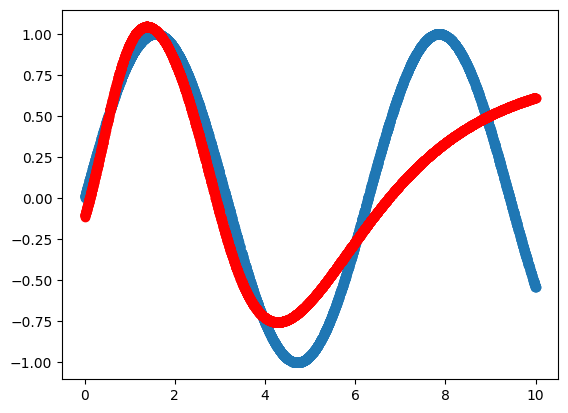

In [104]:
rst = model2.predict(test_x)

plt.scatter(test_x, test_y)
plt.scatter(test_x, rst, color='r')
plt.show()

In [102]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.001)

In [103]:
model3 = keras.Sequential()
model3.add(Dense(10, activation='tanh', input_shape=(1,)))
model3.add(Dense(10, activation='tanh'))
model3.add(Dense(1))

model3.compile(optimizer='SGD', loss='mse', metrics=['mse'])

start_time = time.time()
history = model3.fit(train_x, train_y, epochs=100, verbose=2, batch_size=20)
print("학습시간 : {}".format(time.time() - start_time))

Epoch 1/100


C:\Users\hi\anaconda3\envs\p310_cnn\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


300/300 - 1s - 2ms/step - loss: 0.3901 - mse: 0.3901
Epoch 2/100
300/300 - 0s - 836us/step - loss: 0.3419 - mse: 0.3419
Epoch 3/100
300/300 - 0s - 820us/step - loss: 0.3112 - mse: 0.3112
Epoch 4/100
300/300 - 0s - 745us/step - loss: 0.2835 - mse: 0.2835
Epoch 5/100
300/300 - 0s - 784us/step - loss: 0.2575 - mse: 0.2575
Epoch 6/100
300/300 - 0s - 814us/step - loss: 0.2329 - mse: 0.2329
Epoch 7/100
300/300 - 0s - 794us/step - loss: 0.2141 - mse: 0.2141
Epoch 8/100
300/300 - 0s - 879us/step - loss: 0.1985 - mse: 0.1985
Epoch 9/100
300/300 - 0s - 820us/step - loss: 0.1861 - mse: 0.1861
Epoch 10/100
300/300 - 0s - 830us/step - loss: 0.1726 - mse: 0.1726
Epoch 11/100
300/300 - 0s - 833us/step - loss: 0.1626 - mse: 0.1626
Epoch 12/100
300/300 - 0s - 823us/step - loss: 0.1549 - mse: 0.1549
Epoch 13/100
300/300 - 0s - 791us/step - loss: 0.1456 - mse: 0.1456
Epoch 14/100
300/300 - 0s - 807us/step - loss: 0.1402 - mse: 0.1402
Epoch 15/100
300/300 - 0s - 769us/step - loss: 0.1331 - mse: 0.1331
Epo

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step


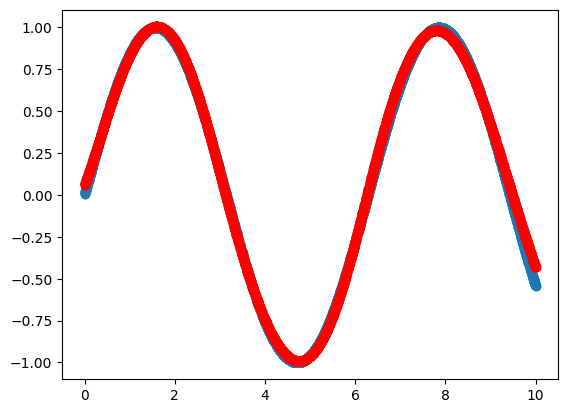

In [105]:
rst = model3.predict(test_x)

plt.scatter(test_x, test_y)
plt.scatter(test_x, rst, color='r')
plt.show()

# OverFitting, DropOut, BatchNormalization, Regularization 처리하는 방법

In [ ]:
from sklearn

In [106]:
!pip install scikit-learn

     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.6 kB ? eta -:--:--
     -------------------------------- ----- 51.2/60.6 kB 871.5 kB/s eta 0:00:01
     -------------------------------------- 60.6/60.6 kB 535.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ----- ---------------------------------- 1.4/10.6 MB 45.9 MB/s eta 0:00:01
   --------- ------------------------------ 2.6/10.6 MB 41.0 MB/s eta 0:00:01
   ------------------ --------------------- 4.9/10.6 MB 45.0 MB/s eta 0:00:01
   -------------------------------- ------- 8.5/10.6 MB 60.4 MB/s eta 0:00:01
   ---------------------------------------  10.6/10.6 MB 65.6 MB/s eta 0:00:01
   ---------------------------------------  10.6/10.6 MB 65.6 MB/s eta 0:00:01
   ---------------------------------------- 10.6/10.6 MB 50.4 MB/s eta 0:00:00
   -

# MakeMoon 데이터 matplitlib으로 표시하기

In [107]:
from sklearn.datasets import make_moons

In [118]:
x, y = make_moons(n_samples=200, noise=0.2, random_state=64)

In [119]:
x

array([[-4.33284954e-01,  8.88269469e-01],
       [ 1.53188463e+00, -8.60258594e-01],
       [ 7.68390388e-02,  9.43501750e-01],
       [ 1.26055482e+00, -2.83812966e-01],
       [ 9.44396636e-01,  3.05758496e-01],
       [-1.07959399e+00,  6.80776115e-01],
       [-1.55950332e-01,  1.66758238e-01],
       [ 2.25677990e+00,  1.42337091e-01],
       [ 4.79020666e-01,  4.87739166e-01],
       [ 2.57481915e-02, -2.87038322e-01],
       [ 6.53979329e-02,  5.05101831e-03],
       [ 1.76540212e-01,  2.32520097e-01],
       [ 5.96452590e-01,  4.85328698e-01],
       [-6.61744846e-01,  8.72541996e-01],
       [ 9.78353954e-01, -3.45460620e-01],
       [-1.49240912e-01,  3.95425244e-01],
       [-9.11042906e-01,  3.68264620e-01],
       [ 2.08749991e-01,  7.65399236e-01],
       [-1.39403831e-01, -9.10057366e-02],
       [ 1.73188313e+00, -1.79502035e-02],
       [ 1.32259213e+00, -6.74350818e-01],
       [ 3.66456957e-01,  2.38721131e-01],
       [-1.98612888e-01,  1.37121507e+00],
       [ 2.

In [120]:
y

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1], dtype=int64)

In [121]:
df = pd.DataFrame(dict(x=x[:,0], y=x[:,1], label=y))

In [122]:
df

,x,y,label
0,-0.433285,0.888269,0
1,1.531885,-0.860259,1
2,0.076839,0.943502,0
3,1.260555,-0.283813,1
4,0.944397,0.305758,0
...,...,...,...
195,0.144641,0.974636,0
196,-0.076464,0.847381,0
197,1.389536,-0.283713,1
198,0.465793,0.008331,1


# 데이터를 이미지로 표시하는 시각화

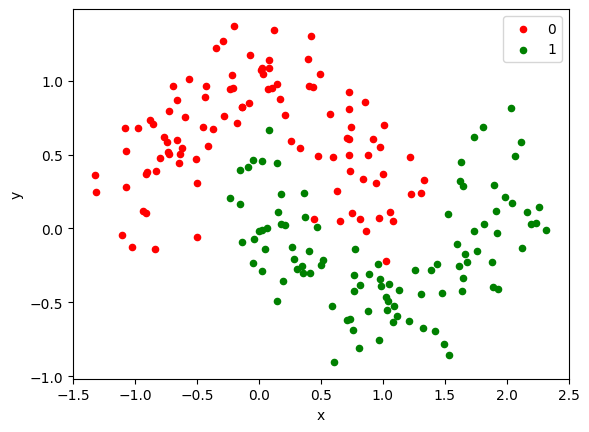

In [123]:
fig, ax = plt.subplots()
groups = df.groupby('label')

colors = ['red','green']

for idx, group in groups:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=idx, color=colors[idx])

plt.show()

# 데이터 Train, test 분리

In [124]:
split_index = int(len(x)*0.7)
train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

In [126]:
(train_x.shape, train_y.shape), (test_x.shape, test_y.shape)

(((140, 2), (140,)), ((60, 2), (60,)))

In [133]:
# Dropout
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l1, l2

model5 = keras.Sequential()
model5.add(Dense(20, input_shape=(2,), activation='relu', kernel_regularizer=l2(0.001)))
model5.add(Dropout(0.3))
model5.add(BatchNormalization())
model5.add(Dense(20, activation='relu', kernel_regularizer=l2(0.001)))
model5.add(Dropout(0.3))
model5.add(BatchNormalization())
model5.add(Dense(1, activation='sigmoid'))

model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model5.fit(
        train_x, 
        train_y, 
        epochs=1000,
        verbose=0,
        batch_size=100,
        validation_data=(test_x,test_y)
        )

C:\Users\hi\anaconda3\envs\p310_cnn\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


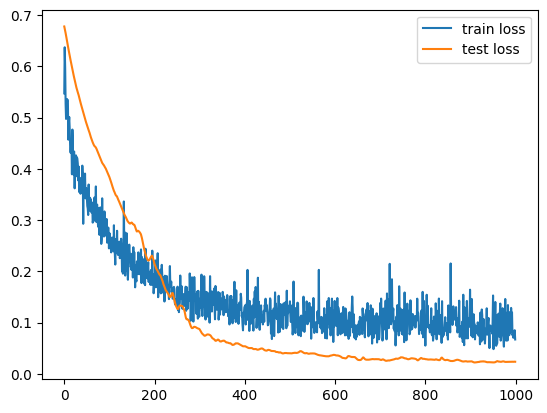

In [134]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.legend()
plt.show()

# 콜백함수

In [149]:
# 학습중 다양한 명령을 수행하고 싶을때 사용하는 함수
from tensorflow.keras.callbacks import Callback

In [150]:
x = np.arange(-1, 1, 0.01)
np.random.shuffle(x)
y = x**2

In [151]:
split_index = int(x.shape[0]*0.6)
train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

In [152]:
(train_x.shape, test_x.shape), (train_y.shape, test_y.shape)

(((120,), (80,)), ((120,), (80,)))

In [153]:
# 콜백함수 생성
def train_callbacks(callbacks):
    model = keras.Sequential()
    model.add(Dense(10, activation='tanh', input_shape=(1,)))
    model.add(Dense(10, activation='tanh'))
    model.add(Dense(1))

    model.compile(optimizer='SGD', loss='mse', metrics=['mse'])

    start_time = time.time()
    model.fit(
        train_x, 
        train_y, 
        epochs=1000, 
        verbose=0, 
        batch_size=20, 
        validation_split=0.1,
        callbacks=callbacks
    )
    
    print("학습 시간 : {}".format(time.time() - start_time))

In [154]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [155]:
check_point = ModelCheckpoint(
    "./best_model_h5.keras", 
    monitor="val_loss",
    mode="auto",
    save_best_only=True)

In [156]:
train_callbacks([check_point])

학습 시간 : 57.12435483932495


# 디스플레이 처리

In [157]:
from IPython.display import clear_output

In [158]:
class PlotLosses(Callback):

  def on_train_begin(self, logs={}):

    self.i = 0
    self.x = []
    self.losses = []
    self.val_losses = []

    self.fig = plt.figure()

    self.logs = []

  def on_epoch_end(self, epoch, logs={}):

    self.logs.append(logs)
    self.x.append(self.i)
    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))
    self.i += 1

    clear_output(wait=True)
    plt.plot(self.x, self.losses, label="loss")
    plt.plot(self.x, self.val_losses, label="val_loss")
    plt.legend()
    plt.show()
    print("loss = ", self.losses[-1], ", val_loss = ", self.val_losses[-1])

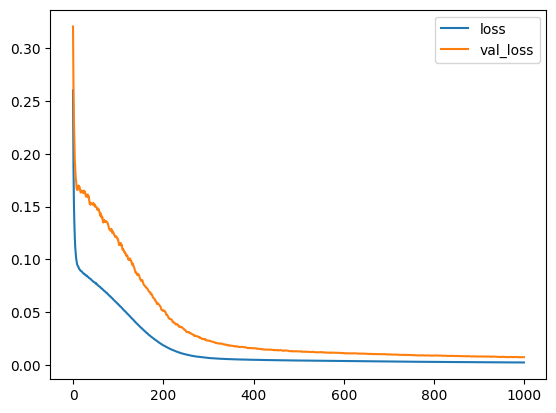

loss =  0.0021804666612297297 , val_loss =  0.007188634946942329
학습 시간 : 200.31452322006226


In [159]:
plt_loss = PlotLosses()
train_callbacks([plt_loss])